#### imports

In [3]:
import tensorflow as tf
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
print("TF Version:", tf.__version__ )

TF Version: 2.6.0


# Part 1

In [20]:
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]
xs = tf.constant(X.astype(np.float32))
ys = tf.constant(Y.astype(np.float32))

In [4]:
#compute gaussian OG
zs = tf.exp(-(xs**2 + ys**2)/2.0)

In [4]:
#compute sine
theta = np.pi
f = 1
zs = tf.math.sin(2 * np.pi * f * (xs * tf.math.cos(theta) + ys * tf.math.sin(theta)))

In [21]:
#product of two functions
theta = np.pi / 4
f = 1
zs = (tf.exp(-(xs**2 + ys**2)/2.0)) * (tf.math.sin(2 * np.pi * f * (xs * tf.math.cos(theta) + ys * tf.math.sin(theta))))

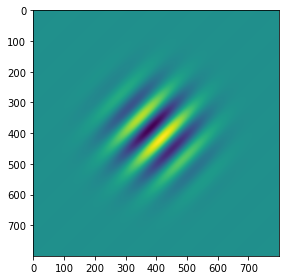

In [22]:
plt.imshow(zs.numpy())
plt.tight_layout()
plt.show()

# Part 2

In [11]:
#base layout
Y, X = np.mgrid[-1.3:1.3:0.0005, -2:1:0.0005]
Z = X+1j*Y
#for different zoom
def zoom (Z, offset, zoom):
    '''
    takes in how much you want to offset the fractal to the left, and then how many times bigger you want to make the fractal
    '''
    return ((Z - offset) * 1/zoom)

# Z = zoom(Z, 4, 4)

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [5]:
#mandelbrot
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + xs
    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4
    # Update variables to compute
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    zs.assign(zs_)

In [12]:
#julia
c = 0.4 - 0.27j
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + c
    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4
    # Update variables to compute
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    zs.assign(zs_)

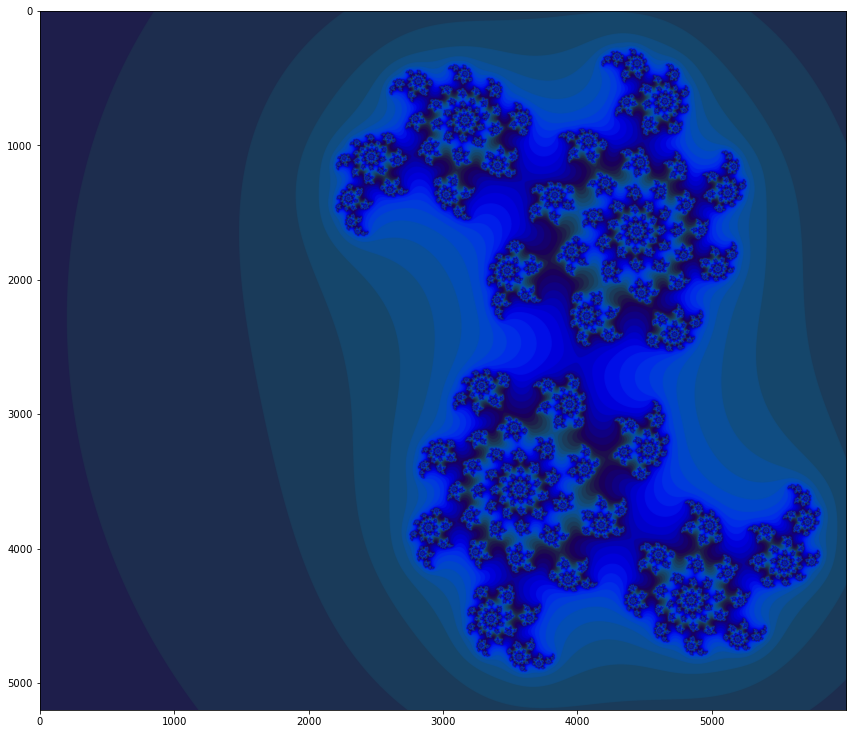

In [13]:
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
    
plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

# Part 3

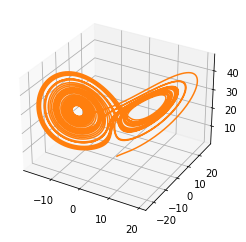

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 40.0
sigma = 16.0
beta = 4.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.001)

states = odeint(f, state0, t)

fig = plt.subplot(projection="3d")
fig.plot(states[:, 0], states[:, 1], states[:, 2], 'C1')

plt.draw()
plt.show()